In [84]:
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as np

nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aligo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aligo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [85]:
BRAND = "maxima"

In [86]:
brands = [
  "latvenergo",
  "rimi",
  "maxima",
  "swedbank",
  "lmt",
  "tet",
  "lg",
  "tele2",
  "airbaltic",
  "olympic",
  "seb",
  "grindeks",
  "citadele",
  "bite",
  "drogas",
  "depo",
  "circlek",
  "lb",
  "optibet",
  "evolution",
];

In [87]:
def readCsv(brand):
    tweets = pd.read_csv('./tweets/raw/'+brand+'.csv')
    tweets['brand'] = brand
    tweets['message'] = tweets['message'].astype(str)
    return tweets

In [88]:
brandTweets = readCsv(BRAND)
len(brandTweets)

1335

In [89]:
brandTweets.head()

,message,id,tweetId,createdAt,language,inReplyToStatusId,inReplyToUserId,inReplyToScreenName,userId,userName,...,placeFullName,placeType,retweetedId,monitoringObjectId1,monitoringObjectId2,queryId,sentiment,retweetCount,label,brand
0,Jāteic tomēr ir patīkami atgriezties pastrādāt...,1480035,925582147989196800,2017-11-01T06:35:55,lv,NaN,NaN,NaN,397270829,Svens Magnuss Evfimi,...,"Riga, Latvia",city,NaN,199,199,438.0,NaN,0,NaN,maxima
1,Es novēlu @maximaveikals šo principu arī reali...,1504959,926404630732509200,2017-11-03T13:04:10,lv,NaN,NaN,NaN,175833146,Jonalta,...,NaN,NaN,NaN,199,199,438.0,NaN,0,NaN,maxima
2,"RPlakanis no @maximaveikals ""Veiksmes faktori ...",1504960,926391123035279400,2017-11-03T12:10:29,lv,NaN,NaN,NaN,273804574,Darba Aizsardzība,...,NaN,NaN,NaN,199,199,438.0,NaN,2,NaN,maxima
3,"RPlakanis no @maximaveikals ""Vesels darbinieks...",1504962,926388329960046600,2017-11-03T11:59:23,lv,NaN,NaN,NaN,273804574,Darba Aizsardzība,...,NaN,NaN,NaN,199,199,438.0,NaN,0,NaN,maxima
4,🎉🍸😏😏🙏🏽 (@ Maxima XX - @maximaveikals in Tukums...,1519965,926808202510983200,2017-11-04T15:47:49,sw,NaN,NaN,NaN,2729790340,Lelde,...,"Tukums, Latvija",city,NaN,199,199,438.0,NaN,0,NaN,maxima


In [90]:
def flatten(t):
    return [item for sublist in t for item in sublist]

def getPopularHashtags():
    popularHashtags = []

    for index, row in brandTweets.iterrows():
        m = row['message'].lower()
        popularHashtags.append(re.findall(r'\B(\#[a-zA-Z]+\b)(?!;)', m))

    h = nltk.FreqDist(flatten(popularHashtags))
    
    return h

In [91]:
print(getPopularHashtags().most_common(15))

[('#dienasbizness', 63), ('#db', 61), ('#maxima', 54), ('#lithuanian', 17), ('#retail', 14), ('#teirdarbs', 14), ('#latvia', 9), ('#retailer', 8), ('#latvija', 7), ('#grocery', 4), ('#rimi', 4), ('#selfcheckout', 3), ('#poland', 3), ('#riga', 3), ('#polish', 3)]


In [92]:
def clean_tweets(data):
#     lowercase posts and clean data with regexs
    newLine ="\\n"
    urls = '(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
    numbers = '\d+((\.|\-)\d+)?'
    mentions = '\B\@([\w\-]+)'
    hashtag = '#'
    punctuationAfterWord = '(?<=\s)|(?<=^)|(?<=\b)(?:[-\'.%$#&,\/:!-?`“–&]\b|\b[-\'.%$#&,\/:!-?`“–&])+(?=\s|$|\b)'
    punctuation = '[(,|.|!|\-|\–|\`|?|:|“|”|►|;|\'|%|&|@)]'
    smile = ':\)|=\)'
    frown = ':\(|=\('
    whitespacesOrSlash = '\s+|\/'
    leadTrailWhitespace = '^\s+|\s+?$'

    data['clean_message'] = data['message'].str.lower()
    data['clean_message'] = data['clean_message'].str.replace(newLine,' ',regex=True)
    data['clean_message'] = data['clean_message'].str.replace(urls,' URL ',regex=True)
    data['clean_message'] = data['clean_message'].str.replace(mentions,' MENTION ',regex=True)
    data['clean_message'] = data['clean_message'].str.replace(smile,'SMILE',regex=True)
    data['clean_message'] = data['clean_message'].str.replace(frown,'FROWN',regex=True)
    data['clean_message'] = data['clean_message'].str.replace(punctuation,' ',regex=True)
    data['clean_message'] = data['clean_message'].str.replace(numbers,' NMBR ',regex=True)
    data['clean_message'] = data['clean_message'].str.replace(hashtag,' ',regex=True)
    data['clean_message'] = data['clean_message'].str.replace(punctuationAfterWord,'',regex=True)
    data['clean_message'] = data['clean_message'].str.replace(whitespacesOrSlash,' ',regex=True)
    data['clean_message'] = data['clean_message'].str.replace(leadTrailWhitespace,'',regex=True)
    
#     tokenize and remove stopwords
    stopwords_lv = ["ārpus", "šaipus", "aiz", "ap", "apakš", "apakšpus", "arī", "ar", "ar", "augšpus", "būšu", "būs", "būsi", "būsiet", "būsim", "būt", "bet", "bez", "bijām", "bijāt", "bija", "biji", "biju", "caur", "dēļ", "diemžēl", "diezin", "droši", "esam", "esat", "esi", "esmu", "gan", "gar", "iekām", "iekāms", "iekš", "iekšpus", "iekam", "iekams", "ik", "ir", "it", "itin", "iz", "jā", "ja", "jau", "jebšu", "jeb", "jel", "jo", "kā", "kļūšu", "kļūs", "kļūsi", "kļūsiet", "kļūsim", "kļūst", "kļūstam	kļūstat", "kļūsti", "kļūstu", "kļūt", "kļuvām", "kļuvāt", "kļuva", "kļuvi", "kļuvu", "ka", "kamēr", "kaut", "kolīdz", "kopš", "līdz", "līdzko", "labad", "lai", "lejpus", "nē", "ne", "nebūt", "nedz", "nekā", "nevis", "nezin", "no", "nu", "otrpus", "pār", "pēc", "pa", "par", "pat", "pie", "pirms", "pret", "priekš", "starp", "tā", "tādēļ", "tālab", "tāpēc", "taču", "tad", "tak", "tapāt", "tapšu", "tapi", "taps", "tapsi", "tapsiet", "tapsim", "tapt", "te", "tiec", "tiek", "tiekam", "tiekat", "tieku	tikām", "tikāt", "tikšu", "tik", "tika", "tikai", "tiki", "tikko", "tiklīdz", "tiklab", "tiks", "tiksiet", "tiksim", "tikt", "tiku", "tikvien", "tomēr", "topat", "turpretī", "turpretim", "un", "uz", "vai", "varēšu", "varējām", "varējāt", "varēja", "varēji", "varēju", "varēs", "varēsi", "varēsiet", "varēsim", "varēt", "var", "varat", "viņpus", "vien", "vien", "virs", "virspus", "vis", "zem"]
    message_no_stopwords=[]

    for message in data.clean_message:
        text_tokens = word_tokenize(message)
        tokens_without_stop_words = [word for word in text_tokens if not word in stopwords_lv]
        message_no_stopwords.append((" ").join(tokens_without_stop_words))

    data['message_no_stopwords'] = message_no_stopwords
    return data

In [93]:
brandTweets = clean_tweets(brandTweets)
brandTweets.head()

,message,id,tweetId,createdAt,language,inReplyToStatusId,inReplyToUserId,inReplyToScreenName,userId,userName,...,retweetedId,monitoringObjectId1,monitoringObjectId2,queryId,sentiment,retweetCount,label,brand,clean_message,message_no_stopwords
0,Jāteic tomēr ir patīkami atgriezties pastrādāt...,1480035,925582147989196800,2017-11-01T06:35:55,lv,NaN,NaN,NaN,397270829,Svens Magnuss Evfimi,...,NaN,199,199,438.0,NaN,0,NaN,maxima,jāteic tomēr ir patīkami atgriezties pastrādāt...,jāteic patīkami atgriezties pastrādāt bijušā d...
1,Es novēlu @maximaveikals šo principu arī reali...,1504959,926404630732509200,2017-11-03T13:04:10,lv,NaN,NaN,NaN,175833146,Jonalta,...,NaN,199,199,438.0,NaN,0,NaN,maxima,es novēlu MENTION šo principu arī realizēt dzī...,es novēlu MENTION šo principu realizēt dzīvē p...
2,"RPlakanis no @maximaveikals ""Veiksmes faktori ...",1504960,926391123035279400,2017-11-03T12:10:29,lv,NaN,NaN,NaN,273804574,Darba Aizsardzība,...,NaN,199,199,438.0,NaN,2,NaN,maxima,"rplakanis no MENTION ""veiksmes faktori sadarbī...",rplakanis MENTION `` veiksmes faktori sadarbīb...
3,"RPlakanis no @maximaveikals ""Vesels darbinieks...",1504962,926388329960046600,2017-11-03T11:59:23,lv,NaN,NaN,NaN,273804574,Darba Aizsardzība,...,NaN,199,199,438.0,NaN,0,NaN,maxima,"rplakanis no MENTION ""vesels darbinieks ir lai...",rplakanis MENTION `` vesels darbinieks laimīgs...
4,🎉🍸😏😏🙏🏽 (@ Maxima XX - @maximaveikals in Tukums...,1519965,926808202510983200,2017-11-04T15:47:49,sw,NaN,NaN,NaN,2729790340,Lelde,...,NaN,199,199,438.0,NaN,0,NaN,maxima,🎉🍸😏😏🙏🏽 maxima xx MENTION in tukums tukuma nov ...,🎉🍸😏😏🙏🏽 maxima xx MENTION in tukums tukuma nov ...


In [94]:
def find_features_no_brands(clean_tweet):
    words = word_tokenize(clean_tweet)
    features = {}
    
    #read generated features with no brand names
    with open('./data/wordFeaturesWithoutBrands.data', 'rb') as filehandle:
        # read the data as binary data stream
        word_features = pickle.load(filehandle)
    
    for word in word_features:
        features[word] = (word in words)
    return features

In [95]:
def classifyTweet_NB(clean_tweet):
    modelFile = './nb/nb_tweet_classifier.sav'
    
    loaded_model = pickle.load(open(modelFile, 'rb'))
    
    featureset = find_features_no_brands(clean_tweet)
    
    result = loaded_model.classify(featureset)
        
    return result

In [46]:
# for index, row in latvenergoTweets.iterrows():
#     latvenergoTweets[index]["NB_label"] = classifyTweet_NB(row["message_no_stopwords"])
    
# latvenergoTweets['NB_label'] = classifyTweet_NB(latvenergoTweets['message_no_stopwords'])
# latvenergoTweets.head()

# print(classifyTweet_NB(latvenergoTweets.loc[42]['message_no_stopwords']), latvenergoTweets.loc[42]['label'])

0 nan


In [96]:
NBlabels = []
for index, row in brandTweets.iterrows():
    if(np.isnan(row["label"])):
        NBlabels.append(classifyTweet_NB(row["message_no_stopwords"]))
    else:
        NBlabels.append(int(row["label"]))

brandTweets["NB_label"] = NBlabels
brandTweets.head()

,message,id,tweetId,createdAt,language,inReplyToStatusId,inReplyToUserId,inReplyToScreenName,userId,userName,...,monitoringObjectId1,monitoringObjectId2,queryId,sentiment,retweetCount,label,brand,clean_message,message_no_stopwords,NB_label
0,Jāteic tomēr ir patīkami atgriezties pastrādāt...,1480035,925582147989196800,2017-11-01T06:35:55,lv,NaN,NaN,NaN,397270829,Svens Magnuss Evfimi,...,199,199,438.0,NaN,0,NaN,maxima,jāteic tomēr ir patīkami atgriezties pastrādāt...,jāteic patīkami atgriezties pastrādāt bijušā d...,0
1,Es novēlu @maximaveikals šo principu arī reali...,1504959,926404630732509200,2017-11-03T13:04:10,lv,NaN,NaN,NaN,175833146,Jonalta,...,199,199,438.0,NaN,0,NaN,maxima,es novēlu MENTION šo principu arī realizēt dzī...,es novēlu MENTION šo principu realizēt dzīvē p...,0
2,"RPlakanis no @maximaveikals ""Veiksmes faktori ...",1504960,926391123035279400,2017-11-03T12:10:29,lv,NaN,NaN,NaN,273804574,Darba Aizsardzība,...,199,199,438.0,NaN,2,NaN,maxima,"rplakanis no MENTION ""veiksmes faktori sadarbī...",rplakanis MENTION `` veiksmes faktori sadarbīb...,0
3,"RPlakanis no @maximaveikals ""Vesels darbinieks...",1504962,926388329960046600,2017-11-03T11:59:23,lv,NaN,NaN,NaN,273804574,Darba Aizsardzība,...,199,199,438.0,NaN,0,NaN,maxima,"rplakanis no MENTION ""vesels darbinieks ir lai...",rplakanis MENTION `` vesels darbinieks laimīgs...,0
4,🎉🍸😏😏🙏🏽 (@ Maxima XX - @maximaveikals in Tukums...,1519965,926808202510983200,2017-11-04T15:47:49,sw,NaN,NaN,NaN,2729790340,Lelde,...,199,199,438.0,NaN,0,NaN,maxima,🎉🍸😏😏🙏🏽 maxima xx MENTION in tukums tukuma nov ...,🎉🍸😏😏🙏🏽 maxima xx MENTION in tukums tukuma nov ...,0


In [97]:
brandTweets["NB_label"].value_counts()

0    1115
2     214
1       6
Name: NB_label, dtype: int64

In [98]:
brandTweets["label"].value_counts()

0.0    9
1.0    6
Name: label, dtype: int64

In [99]:
indexesOfPositiveTweets = brandTweets.index[brandTweets["NB_label"]==1]

for i in indexesOfPositiveTweets:
    print(brandTweets.loc[i]['message'],'\n')

Kas paveikts kopš lielveikala Maxima sagrūšanas Zolitūdē cietušo atbalstam, būvniecības uzraudzības kvalitātes celšanai un civilās aizsardzības uzlabošanai? https://t.co/FLUUtBboJI https://t.co/FP6RdNBhtd 

Ēkā celtniecības darbi, bet ievēroju- RIMI ir atvērts. 
Tas tiešām ir atvērts, bet vai grib iet Maxima pēdās?..... https://t.co/cP3zA66dbT 

Kas paveikts kopš lielveikala Maxima sagrūšanas Zolitūdē cietušo atbalstam, būvniecības uzraudzības kvalitātes celšanai un civilās aizsardzības uzlabošanai? https://t.co/FLUUtBboJI https://t.co/XA0IOEqqRe 

Kas paveikts kopš lielveikala Maxima sagrūšanas Zolitūdē cietušo atbalstam, būvniecības uzraudzības kvalitātes celšanai un civilās aizsardzības uzlabošanai? https://t.co/DuU2F3bHV8 https://t.co/cC9wjsPDrj 

Jau nākamā gada otrajā pusē atvērsim jaunu Maxima XXX veikalu Rīgā, Grostonas ielā 1. Mūsu klientiem veikalā būs pieejamas vairāk nekā 60 tūkstošu dažādu pārtikas un rūpniecības preču, kā arī pieprasītie vegānu un veģetāriešu pārtikas pro

In [100]:
import datetime
datetime_object = datetime.datetime.strptime(brandTweets.loc[42]['createdAt'], '%Y-%m-%dT%H:%M:%S').strftime('%Y,%m,%d')

print(datetime_object)

2017,11,21


In [101]:
brandTweets['createdAt']

0             2017-11-01T06:35:55
1             2017-11-03T13:04:10
2             2017-11-03T12:10:29
3             2017-11-03T11:59:23
4             2017-11-04T15:47:49
                  ...            
1330    2021-04-22T21:59:03+00:00
1331    2021-04-23T08:42:11+00:00
1332    2021-04-25T15:01:31+00:00
1333    2021-04-26T10:38:55+00:00
1334    2021-04-26T18:42:59+00:00
Name: createdAt, Length: 1335, dtype: object

In [102]:
print(brandTweets.loc[1078]['createdAt'])

print(brandTweets.loc[1078]['createdAt'].replace('+00:00',''))

2020-07-07T11:45:00+00:00
2020-07-07T11:45:00


In [103]:
dates_no_0 = []
for index, row in brandTweets.iterrows():
    dates_no_0.append(row['createdAt'].replace('+00:00',''))

brandTweets["date_no_0"] = dates_no_0

brandTweets['date_no_0']

0       2017-11-01T06:35:55
1       2017-11-03T13:04:10
2       2017-11-03T12:10:29
3       2017-11-03T11:59:23
4       2017-11-04T15:47:49
               ...         
1330    2021-04-22T21:59:03
1331    2021-04-23T08:42:11
1332    2021-04-25T15:01:31
1333    2021-04-26T10:38:55
1334    2021-04-26T18:42:59
Name: date_no_0, Length: 1335, dtype: object

In [104]:
dates = []
for index, row in brandTweets.iterrows():
    dates.append(datetime.datetime.strptime(row['date_no_0'], '%Y-%m-%dT%H:%M:%S').strftime('%Y,%m,%d'))

brandTweets["date"] = dates
brandTweets.head()

,message,id,tweetId,createdAt,language,inReplyToStatusId,inReplyToUserId,inReplyToScreenName,userId,userName,...,queryId,sentiment,retweetCount,label,brand,clean_message,message_no_stopwords,NB_label,date_no_0,date
0,Jāteic tomēr ir patīkami atgriezties pastrādāt...,1480035,925582147989196800,2017-11-01T06:35:55,lv,NaN,NaN,NaN,397270829,Svens Magnuss Evfimi,...,438.0,NaN,0,NaN,maxima,jāteic tomēr ir patīkami atgriezties pastrādāt...,jāteic patīkami atgriezties pastrādāt bijušā d...,0,2017-11-01T06:35:55,"2017,11,01"
1,Es novēlu @maximaveikals šo principu arī reali...,1504959,926404630732509200,2017-11-03T13:04:10,lv,NaN,NaN,NaN,175833146,Jonalta,...,438.0,NaN,0,NaN,maxima,es novēlu MENTION šo principu arī realizēt dzī...,es novēlu MENTION šo principu realizēt dzīvē p...,0,2017-11-03T13:04:10,"2017,11,03"
2,"RPlakanis no @maximaveikals ""Veiksmes faktori ...",1504960,926391123035279400,2017-11-03T12:10:29,lv,NaN,NaN,NaN,273804574,Darba Aizsardzība,...,438.0,NaN,2,NaN,maxima,"rplakanis no MENTION ""veiksmes faktori sadarbī...",rplakanis MENTION `` veiksmes faktori sadarbīb...,0,2017-11-03T12:10:29,"2017,11,03"
3,"RPlakanis no @maximaveikals ""Vesels darbinieks...",1504962,926388329960046600,2017-11-03T11:59:23,lv,NaN,NaN,NaN,273804574,Darba Aizsardzība,...,438.0,NaN,0,NaN,maxima,"rplakanis no MENTION ""vesels darbinieks ir lai...",rplakanis MENTION `` vesels darbinieks laimīgs...,0,2017-11-03T11:59:23,"2017,11,03"
4,🎉🍸😏😏🙏🏽 (@ Maxima XX - @maximaveikals in Tukums...,1519965,926808202510983200,2017-11-04T15:47:49,sw,NaN,NaN,NaN,2729790340,Lelde,...,438.0,NaN,0,NaN,maxima,🎉🍸😏😏🙏🏽 maxima xx MENTION in tukums tukuma nov ...,🎉🍸😏😏🙏🏽 maxima xx MENTION in tukums tukuma nov ...,0,2017-11-04T15:47:49,"2017,11,04"


In [105]:
print(brandTweets["date"].tolist()[:8])

['2017,11,01', '2017,11,03', '2017,11,03', '2017,11,03', '2017,11,04', '2017,11,07', '2017,11,08', '2017,11,08']


## Count sentiment for each day

In [137]:
class dateSentimentValues: 
    def __init__(self, date, tweetCount, neutralCount, positiveCount, negativeCount): 
        self.date = date 
        self.tweetCount = tweetCount
        self.neutralCount = neutralCount
        self.positiveCount = positiveCount
        self.negativeCount = negativeCount

In [138]:
sentimentList = []

for index, row in brandTweets.iterrows():
    existingDate = 0
    if (len(sentimentList)==0):
        if(row['NB_label']==0):
            sentimentList.append(dateSentimentValues(row['date'], (1 + row['retweetCount']), (1 + row['retweetCount']), 0, 0))
        elif(row['NB_label']==1):
            sentimentList.append(dateSentimentValues(row['date'], (1 + row['retweetCount']), 0, (1 + row['retweetCount']), 0))
        elif(row['NB_label']==2):
            sentimentList.append(dateSentimentValues(row['date'], (1 + row['retweetCount']), 0, 0, (1 + row['retweetCount'])))
    else:
        for item in sentimentList:
            if(item.date == row['date']):
                existingDate = 1
                item.tweetCount += (1 + row['retweetCount'])
                if(row['NB_label']==0):
                    item.neutralCount+=1
                elif(row['NB_label']==1):
                    item.positiveCount+=1
                elif(row['NB_label']==2):
                    item.negativeCount+=1
                break
        if(existingDate==0):
            if(row['NB_label']==0):
                sentimentList.append(dateSentimentValues(row['date'], (1 + row['retweetCount']), (1 + row['retweetCount']), 0, 0))
            elif(row['NB_label']==1):
                sentimentList.append(dateSentimentValues(row['date'], (1 + row['retweetCount']), 0, (1 + row['retweetCount']), 0))
            elif(row['NB_label']==2):
                sentimentList.append(dateSentimentValues(row['date'], (1 + row['retweetCount']), 0, 0, (1 + row['retweetCount'])))

In [139]:
for item in sentimentList[:5]:
    print(item.date, item.tweetCount)

2017,11,01 1
2017,11,03 5
2017,11,04 1
2017,11,07 1
2017,11,08 21


In [140]:
dates = []
tweetCounts=[]
neutralCounts = []
positiveCounts=[]
negativeCounts =[]

for item in sentimentList:
    dates.append(item.date)
    tweetCounts.append(item.tweetCount)
    neutralCounts.append(item.neutralCount)
    positiveCounts.append(item.positiveCount) 
    negativeCounts.append(item.negativeCount)

In [141]:
negativeCounts[:5]

[0, 0, 0, 0, 0]

In [142]:
# # plot_time_series.py

# import matplotlib.pyplot as plt
# from datetime import datetime, timedelta
# plt.style.use('seaborn')

# dates = dates

# y = tweetCounts

# plt.plot_date(dates, y, linestyle ='solid')
# plt.tight_layout()
# plt.show()

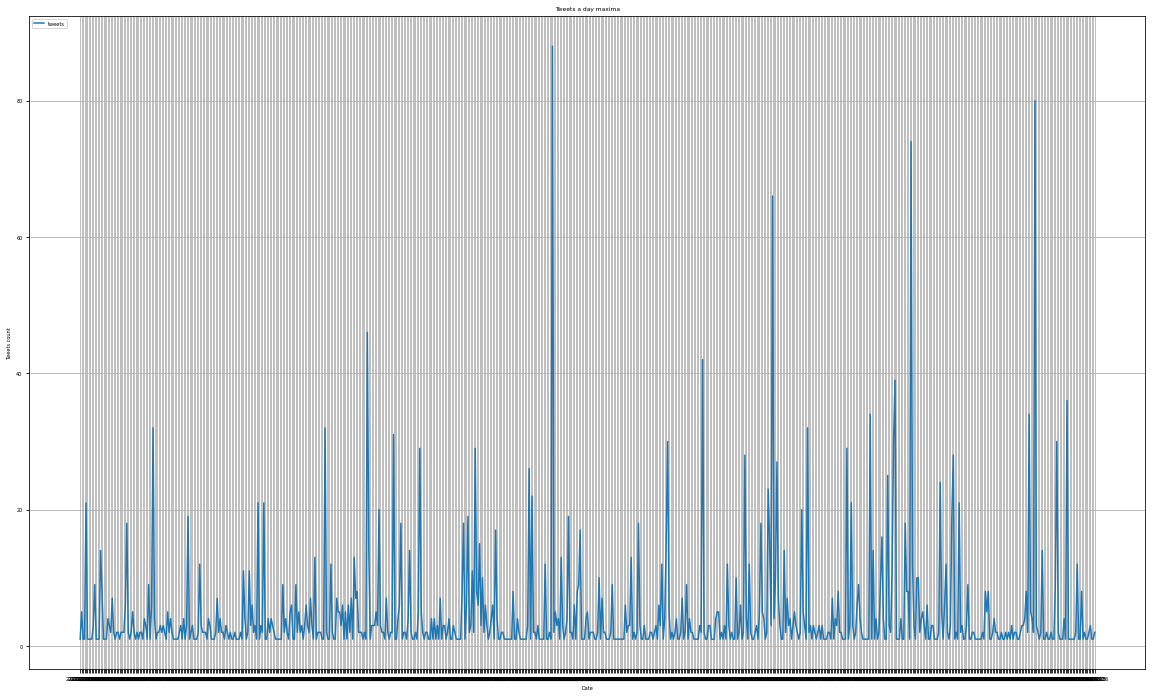

In [143]:
import matplotlib.pyplot as plt

plt.rc('font', size=5)
fig, ax = plt.subplots(figsize=(20, 12))

# Specify how our lines should look
ax.plot(dates, tweetCounts, label='tweets')

ax.set_xlabel('Date')
ax.set_ylabel('Tweets count')
ax.set_title('Tweets a day '+BRAND)
ax.grid(True)
ax.legend(loc='upper left');

In [144]:
from datetime import datetime, timedelta

# d= datetime.strptime(startDate, '%Y,%m,%d').date()
d="2020,12,12".split(",")

date = datetime(int(d[0]),int(d[1]),int(d[2]))
for i in range(5): 
    date += timedelta(days=1)
    print(date.date()) 
    
print((date).strftime('%Y,%m,%d'))

2020-12-13
2020-12-14
2020-12-15
2020-12-16
2020-12-17
2020,12,17


In [145]:
def findClosestDate(date):
    dateArr = date.split(",")
    d = datetime(int(dateArr[0]),int(dateArr[1]),int(dateArr[2])) #separated by -
    while(d.strftime('%Y,%m,%d') not in dates):
        d += timedelta(days=1)

    return dates.index(d.strftime('%Y,%m,%d'))

In [146]:
date = "2020,01,01"
print(findClosestDate(date))

433


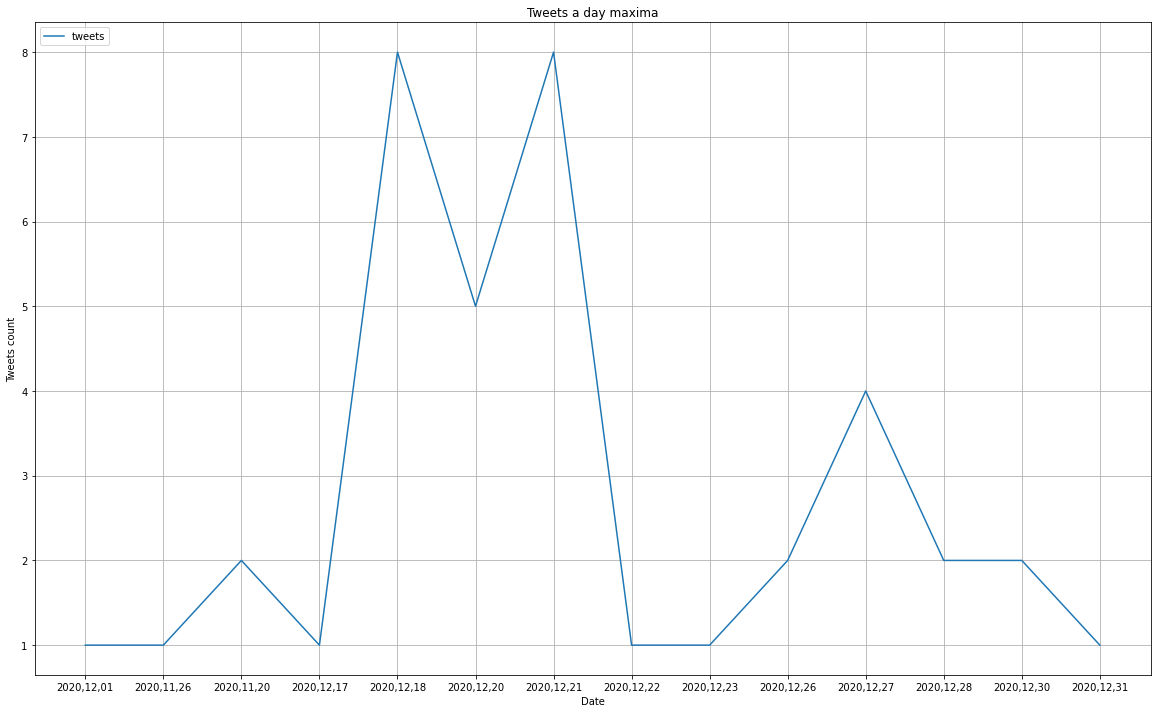

In [147]:
startDate = "2020,12,01"
endDate = "2021,01,01"

startIndex= findClosestDate(startDate)
endIndex= findClosestDate(endDate)
    
plt.rc('font', size=10)
fig, ax = plt.subplots(figsize=(20, 12))

# Specify how our lines should look
ax.plot(dates[startIndex:endIndex], tweetCounts[startIndex:endIndex], label='tweets')

ax.set_xlabel('Date')
ax.set_ylabel('Tweets count')
ax.set_title('Tweets a day '+ BRAND)
ax.grid(True)
ax.legend(loc='upper left');

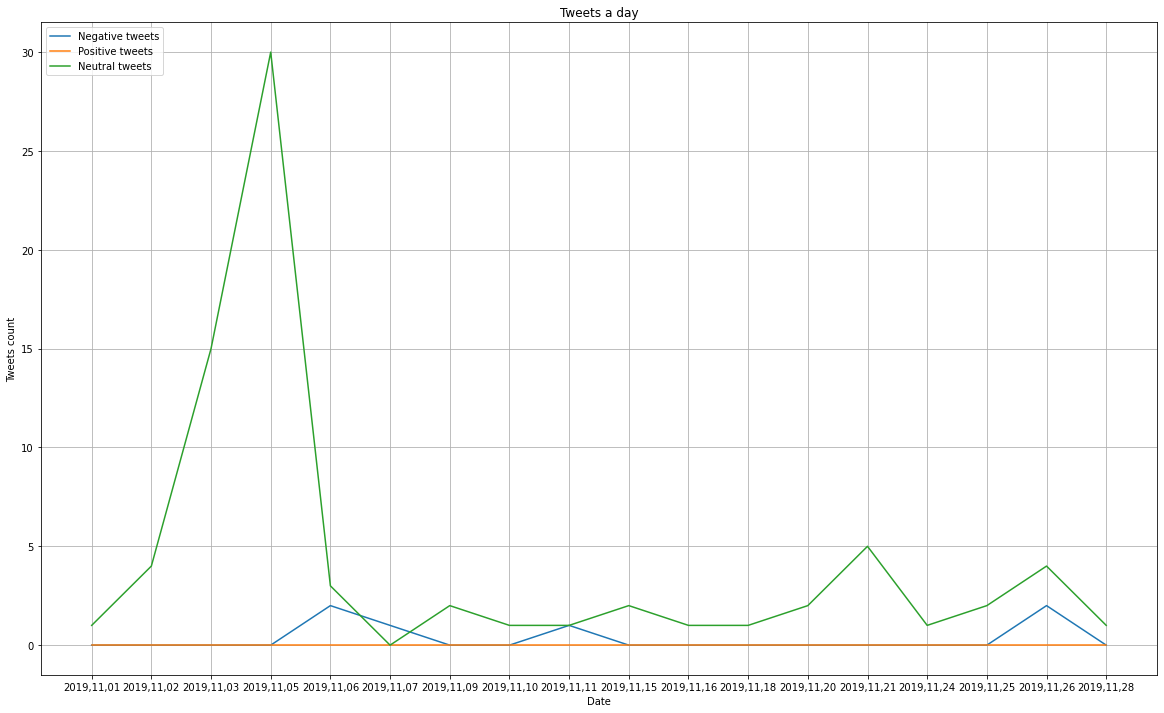

In [149]:
startDate = "2019,11,01"
endDate = "2019,12,01"

startIndex= findClosestDate(startDate)
endIndex= findClosestDate(endDate)
    
plt.rc('font', size=10)
fig, ax = plt.subplots(figsize=(20, 12))

# Specify how our lines should look
ax.plot(dates[startIndex:endIndex], negativeCounts[startIndex:endIndex], label='Negative tweets')
ax.plot(dates[startIndex:endIndex], positiveCounts[startIndex:endIndex], label='Positive tweets')
ax.plot(dates[startIndex:endIndex], neutralCounts[startIndex:endIndex], label='Neutral tweets')

ax.set_xlabel('Date')
ax.set_ylabel('Tweets count')
ax.set_title('Tweets a day')
ax.grid(True)
ax.legend(loc='upper left');

In [150]:
sentimentCounts = []
for date in dates:
    i = dates.index(date)
    sentiment = positiveCounts[i] - negativeCounts[i]
    sentimentCounts.append(sentiment)
    
sentimentCounts[:5]

[0, 0, 0, 0, 0]

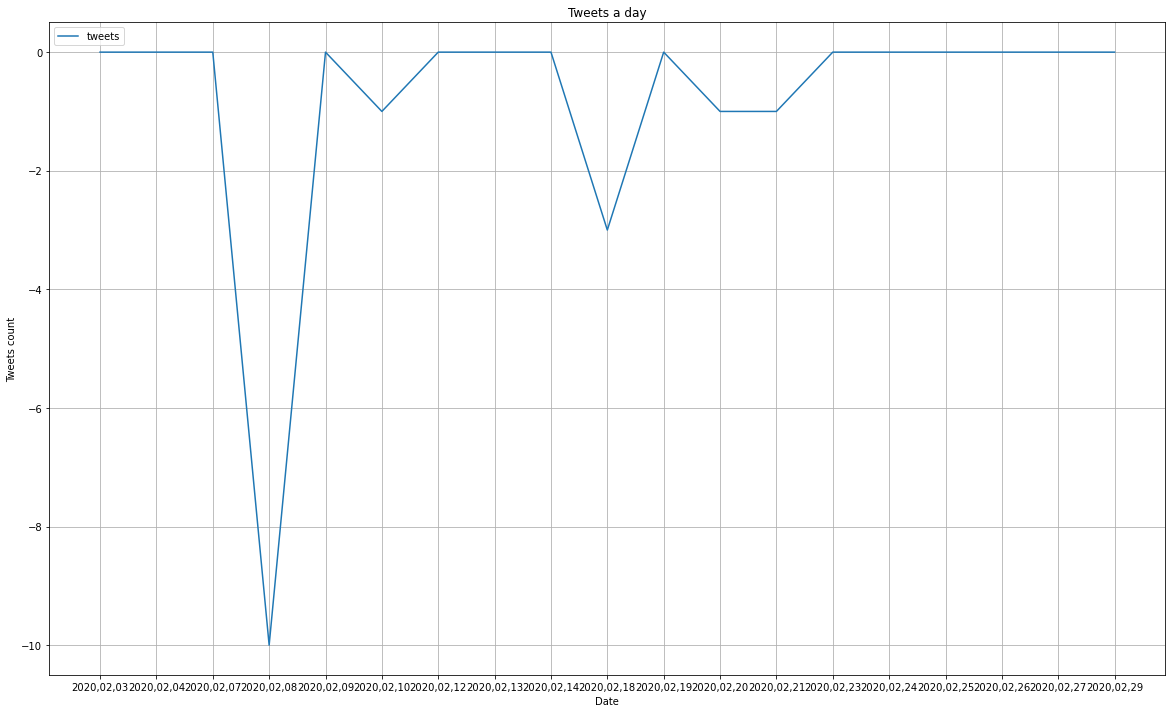

In [151]:
startDate = "2020,02,01"
endDate = "2020,03,01"

startIndex= findClosestDate(startDate)
endIndex= findClosestDate(endDate)
    
plt.rc('font', size=10)
fig, ax = plt.subplots(figsize=(20, 12))

# Specify how our lines should look
ax.plot(dates[startIndex:endIndex], sentimentCounts[startIndex:endIndex], label='tweets')

ax.set_xlabel('Date')
ax.set_ylabel('Tweets count')
ax.set_title('Tweets a day')
ax.grid(True)
ax.legend(loc='upper left');

# By Month

In [152]:
dateArr = brandTweets.iloc[1]["date"].split(",")
month = dateArr[0]+","+dateArr[1]
print(month)

2017,11


In [153]:
sentimentByMonthList = []

for index, row in brandTweets.iterrows():
    existingDate = 0
    dateArr = row['date'].split(",")
    month = dateArr[0]+","+dateArr[1]
    if (len(sentimentByMonthList)==0):
        if(row['NB_label']==0):
            sentimentByMonthList.append(dateSentimentValues(month, (1 + row['retweetCount']), (1 + row['retweetCount']), 0, 0))
        elif(row['NB_label']==1):
            sentimentByMonthList.append(dateSentimentValues(month, (1 + row['retweetCount']), 0, (1 + row['retweetCount']), 0))
        elif(row['NB_label']==2):
            sentimentByMonthList.append(dateSentimentValues(month, (1 + row['retweetCount']), 0, 0, (1 + row['retweetCount'])))
    else:
        for item in sentimentByMonthList:
            if(item.date == month):
                existingDate = 1
                item.tweetCount += (1 + row['retweetCount'])
                if(row['NB_label']==0):
                    item.neutralCount+=1
                elif(row['NB_label']==1):
                    item.positiveCount+=1
                elif(row['NB_label']==2):
                    item.negativeCount+=1
                break
        if(existingDate==0):
            if(row['NB_label']==0):
                sentimentByMonthList.append(dateSentimentValues(month, (1 + row['retweetCount']), (1 + row['retweetCount']), 0, 0))
            elif(row['NB_label']==1):
                sentimentByMonthList.append(dateSentimentValues(month, (1 + row['retweetCount']), 0, (1 + row['retweetCount']), 0))
            elif(row['NB_label']==2):
                sentimentByMonthList.append(dateSentimentValues(month, (1 + row['retweetCount']), 0, 0, (1 + row['retweetCount'])))

In [154]:
def findClosestMonth(date):
    dateArr = date.split(",")
    d = datetime(int(dateArr[0]),int(dateArr[1]),int(dateArr[2])) #separated by -
    while(d.strftime('%Y,%m') not in months):
        d += timedelta(months=1)

    return months.index(d.strftime('%Y,%m'))

In [155]:
months = []
tweetCounts=[]
neutralCounts = []
positiveCounts=[]
negativeCounts =[]

for item in sentimentByMonthList:
    months.append(item.date)
    tweetCounts.append(item.tweetCount)
    neutralCounts.append(item.neutralCount)
    positiveCounts.append(item.positiveCount) 
    negativeCounts.append(item.negativeCount)

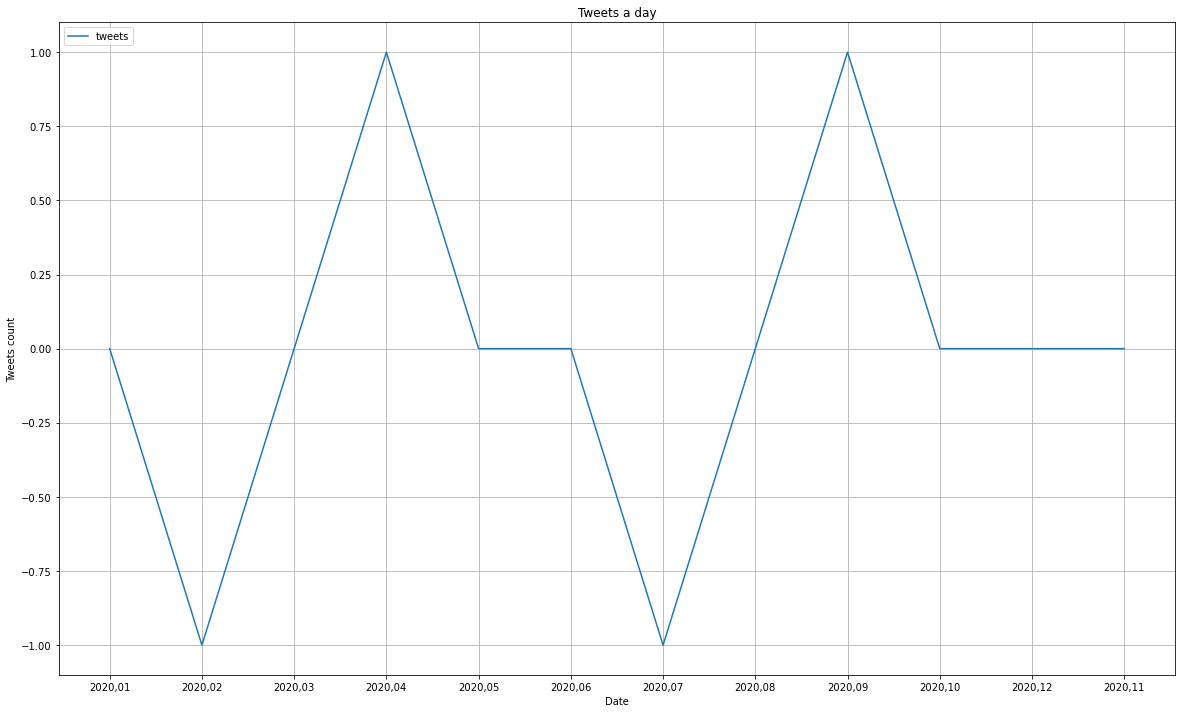

In [156]:
startDate = "2020,01,01"
endDate = "2021,01,01"

startIndex= findClosestMonth(startDate)
endIndex= findClosestMonth(endDate)
    
plt.rc('font', size=10)
fig, ax = plt.subplots(figsize=(20, 12))

# Specify how our lines should look
ax.plot(months[startIndex:endIndex], sentimentCounts[startIndex:endIndex], label='tweets')

ax.set_xlabel('Date')
ax.set_ylabel('Tweets count')
ax.set_title('Tweets a day')
ax.grid(True)
ax.legend(loc='upper left');

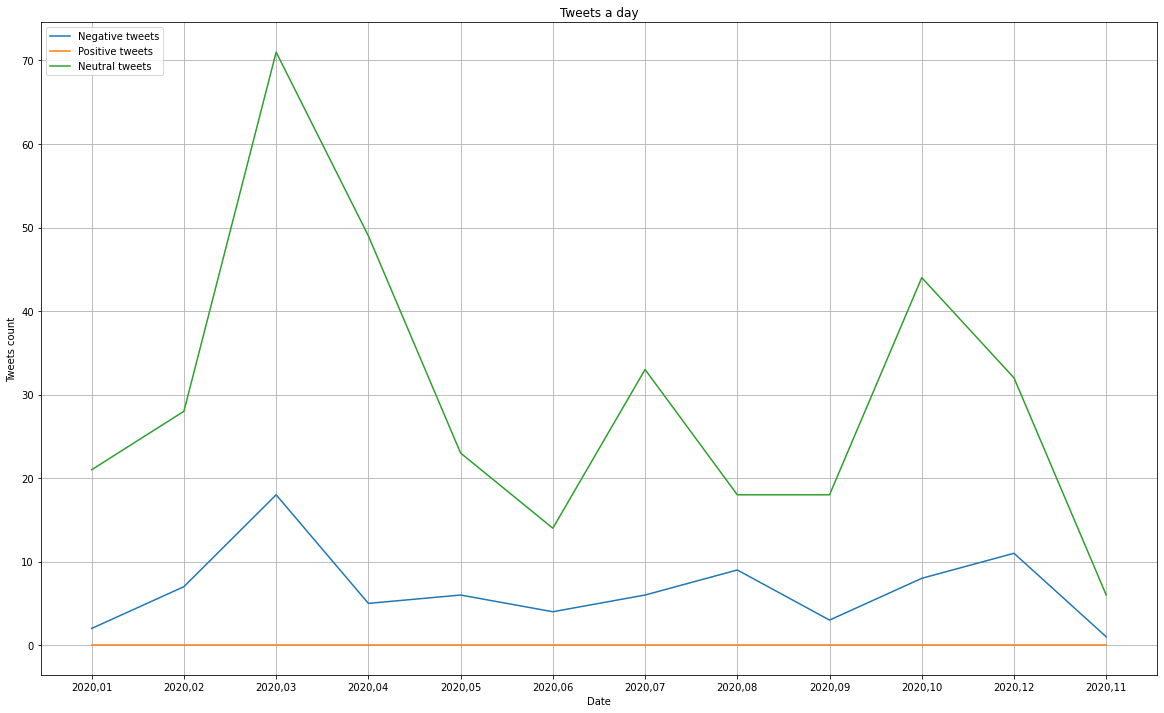

In [159]:
startDate = "2020,01,01"
endDate = "2021,01,01"

startIndex= findClosestMonth(startDate)
endIndex= findClosestMonth(endDate)
    
plt.rc('font', size=10)
fig, ax = plt.subplots(figsize=(20, 12))

# Specify how our lines should look
ax.plot(months[startIndex:endIndex], negativeCounts[startIndex:endIndex], label='Negative tweets')
ax.plot(months[startIndex:endIndex], positiveCounts[startIndex:endIndex], label='Positive tweets')
ax.plot(months[startIndex:endIndex], neutralCounts[startIndex:endIndex], label='Neutral tweets')

ax.set_xlabel('Date')
ax.set_ylabel('Tweets count')
ax.set_title('Tweets a day')
ax.grid(True)
ax.legend(loc='upper left');

In [160]:
brandTweets.head()

,message,id,tweetId,createdAt,language,inReplyToStatusId,inReplyToUserId,inReplyToScreenName,userId,userName,...,queryId,sentiment,retweetCount,label,brand,clean_message,message_no_stopwords,NB_label,date_no_0,date
0,Jāteic tomēr ir patīkami atgriezties pastrādāt...,1480035,925582147989196800,2017-11-01T06:35:55,lv,NaN,NaN,NaN,397270829,Svens Magnuss Evfimi,...,438.0,NaN,0,NaN,maxima,jāteic tomēr ir patīkami atgriezties pastrādāt...,jāteic patīkami atgriezties pastrādāt bijušā d...,0,2017-11-01T06:35:55,"2017,11,01"
1,Es novēlu @maximaveikals šo principu arī reali...,1504959,926404630732509200,2017-11-03T13:04:10,lv,NaN,NaN,NaN,175833146,Jonalta,...,438.0,NaN,0,NaN,maxima,es novēlu MENTION šo principu arī realizēt dzī...,es novēlu MENTION šo principu realizēt dzīvē p...,0,2017-11-03T13:04:10,"2017,11,03"
2,"RPlakanis no @maximaveikals ""Veiksmes faktori ...",1504960,926391123035279400,2017-11-03T12:10:29,lv,NaN,NaN,NaN,273804574,Darba Aizsardzība,...,438.0,NaN,2,NaN,maxima,"rplakanis no MENTION ""veiksmes faktori sadarbī...",rplakanis MENTION `` veiksmes faktori sadarbīb...,0,2017-11-03T12:10:29,"2017,11,03"
3,"RPlakanis no @maximaveikals ""Vesels darbinieks...",1504962,926388329960046600,2017-11-03T11:59:23,lv,NaN,NaN,NaN,273804574,Darba Aizsardzība,...,438.0,NaN,0,NaN,maxima,"rplakanis no MENTION ""vesels darbinieks ir lai...",rplakanis MENTION `` vesels darbinieks laimīgs...,0,2017-11-03T11:59:23,"2017,11,03"
4,🎉🍸😏😏🙏🏽 (@ Maxima XX - @maximaveikals in Tukums...,1519965,926808202510983200,2017-11-04T15:47:49,sw,NaN,NaN,NaN,2729790340,Lelde,...,438.0,NaN,0,NaN,maxima,🎉🍸😏😏🙏🏽 maxima xx MENTION in tukums tukuma nov ...,🎉🍸😏😏🙏🏽 maxima xx MENTION in tukums tukuma nov ...,0,2017-11-04T15:47:49,"2017,11,04"


In [161]:
brandTweets.to_csv('./tweets/brandsNB/'+BRAND+'.csv', index=False)